In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

output_directory = '/home/marco/DataspellProjects/thesis/output/visualization/'

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)

df = pd.read_csv('../../data/ST002498.csv')
df.describe()

,Diagnosis,PreBioPSA,PreviousPositiveBiopsy,Age,EthnicityLatino,Ethnicity,Employment,Education,SmokingEver,FamilyHistoryPrCa,...,X-25948,X-25957,X-26008,X-26054,X-26062,X-26097,X-26107,X-26109,X-26111,X-26119
count,580.000000,576.000000,580.0,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,...,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,0.460345,6.813646,0.0,64.656897,0.058621,3.624138,3.081034,4.912069,0.494828,0.267241,...,17.823704,21.024914,18.816201,17.085630,18.073313,18.687156,19.967458,16.177219,19.919818,16.733838
std,0.498855,8.587811,0.0,8.615839,0.249375,8.210746,2.522846,1.401033,0.507261,0.454449,...,0.632803,0.434979,1.078822,0.583163,1.586642,0.399466,0.578993,0.962527,1.763196,0.647451
min,0.000000,0.260000,0.0,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.231127,19.810562,15.241360,15.705137,15.876781,17.261185,18.148216,13.215355,15.415103,14.919162
25%,0.000000,3.797500,0.0,59.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,...,17.467665,20.749175,18.188942,16.699573,17.162485,18.444661,19.617056,15.482880,18.883770,16.344822
50%,0.000000,5.085000,0.0,65.000000,0.000000,1.000000,1.000000,5.000000,0.000000,0.000000,...,17.741580,21.015685,18.718996,17.029602,17.472598,18.673609,19.987181,16.166960,20.071686,16.676137
75%,1.000000,7.200000,0.0,70.000000,0.000000,1.000000,6.000000,6.000000,1.000000,1.000000,...,18.093447,21.263365,19.330017,17.419523,18.409770,18.906863,20.360499,16.892829,21.162857,17.037447
max,1.000000,144.400000,0.0,85.000000,2.000000,32.000000,10.000000,6.000000,2.000000,2.000000,...,22.569396,23.766016,24.646175,19.886690,25.833702,20.890860,21.441073,19.305017,26.487071,20.912917


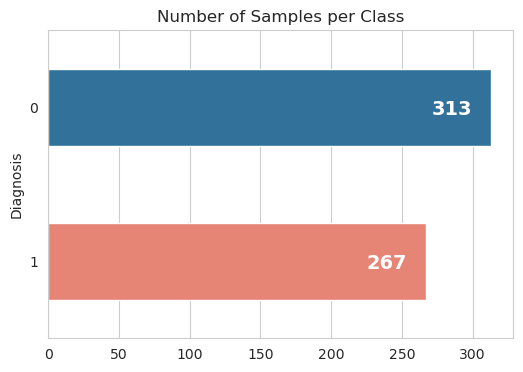

In [2]:
plt.figure(figsize=(6, 4))
sns.countplot(y=df.Diagnosis, data=df, width=0.5)
plt.xlabel("")

#printing total number of classes over the bar
for index, value in enumerate(df.Diagnosis.value_counts()):
    plt.text(value - 42, index + 0.05, str(value), color='white', fontweight='bold', fontsize=14)
plt.title("Number of Samples per Class")
plt.savefig(output_directory + "count_of_each_target_class.png")

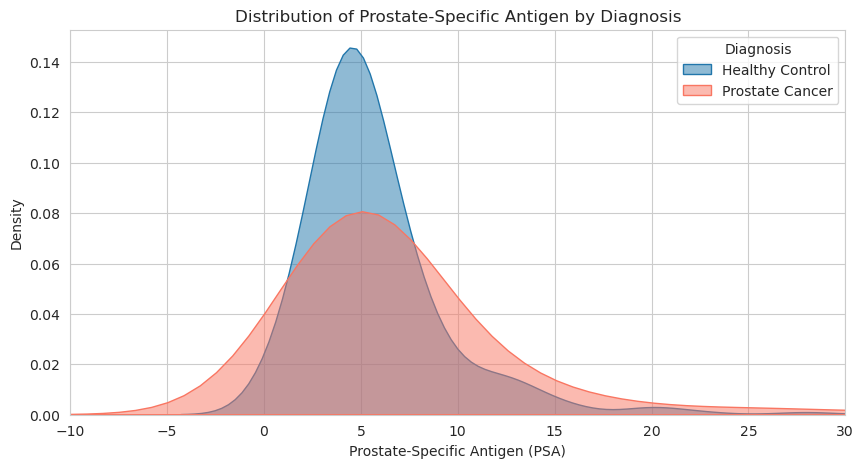

In [3]:
x = "PreBioPSA"
y = "Diagnosis"

plt.figure(figsize=(10, 5))
plt.title("Distribution of Prostate-Specific Antigen by {}".format(y))

plt.xlabel("Prostate-Specific Antigen (PSA)")
plt.ylabel("Density")
#PLOT THE curve with white border
sns.kdeplot(df.loc[df[y] == 0, x], label="y=0", fill=True, alpha=.5)
sns.kdeplot(df.loc[df[y] == 1, x], label="y=1", fill=True, alpha=.5)

plt.legend(title="Diagnosis", loc="upper right", labels=['Healthy Control', 'Prostate Cancer'])
sns.set(style="whitegrid", font_scale=1.5)
#set x-axis limit
plt.xlim(-10, 30)
plt.savefig(output_directory + x + "_" + y + "_distribution.png")

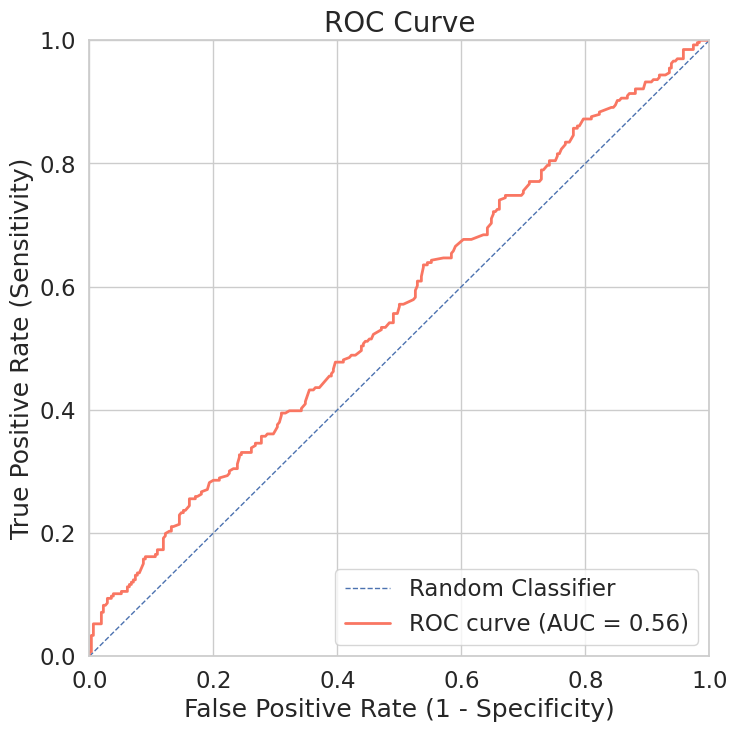

In [4]:

# creating the roc curve for the distributions and calculating the auc
from sklearn.metrics import roc_curve, auc

df_roc = df[[x, y]].dropna()
fpr, tpr, thresholds = roc_curve(df_roc[y], df_roc[x])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))

# plotting the random line
plt.plot([0, 1], [0, 1], lw=1, linestyle='--', label='Random Classifier')

# plotting the roc curve
plt.plot(fpr, tpr, lw=2, color=palette[1], label='ROC curve (AUC = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve', fontsize=20)
plt.legend(loc="lower right")

# showing the plot
plt.savefig(output_directory + x + "_" + y + "_roc_curve.png")

In [5]:
# Calculating p-value to reject the null hypothesis considering that x is binary and y is continuous
from scipy import stats

df_pvalue = df[[x, y]].dropna()
print("p-value: {}".format(stats.ttest_ind(df_pvalue.loc[df_pvalue[y] == 0, x], df_pvalue.loc[df_pvalue[y] == 1, x])[1])) 

p-value: 0.002777798803370699


#2D density plot for sarcosine and citrate divided by Diagnosis

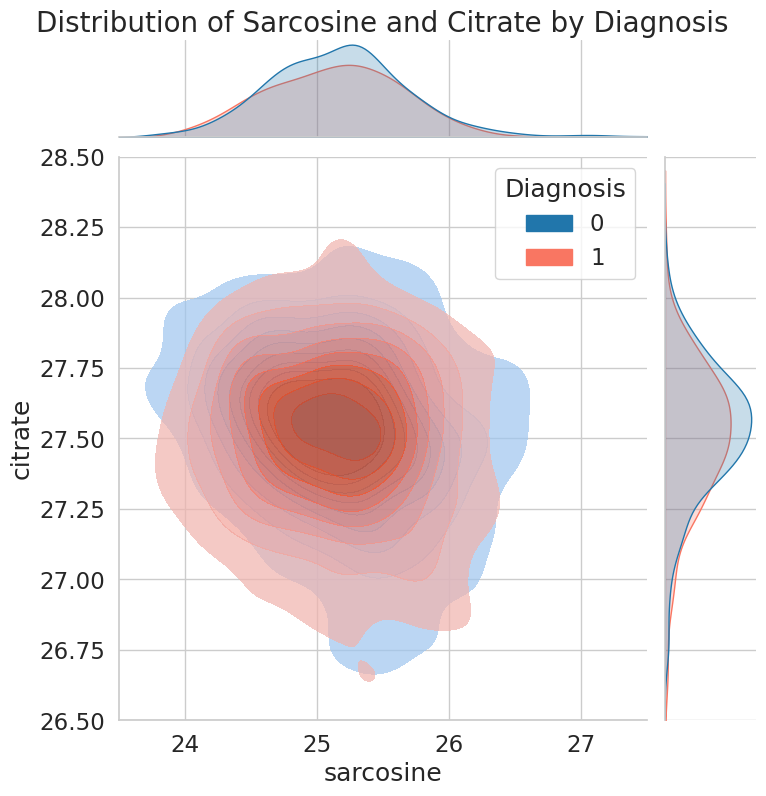

In [6]:
x = "sarcosine"
y = "citrate"
z = "Diagnosis"

# Set the style before creating the plot
sns.set(style="whitegrid", font_scale=1.5)

# Create the jointplot with the correct order of arguments
plot = sns.jointplot(x=x, y=y, data=df, hue=z, fill=True, kind='kde', alpha=.7, height=8, palette=palette[:2],
                     xlim=(23.5, 27.5), ylim=(26.5, 28.5))
# Set labels and legend after creating the plot
plot.set_axis_labels(xlabel=x, ylabel=y)
plot.ax_marg_x.set_title("Distribution of Sarcosine and Citrate by Diagnosis",  fontsize=20)
plot.savefig(output_directory + x + "_" + y + "_distribution.png")

In [7]:

#selecting the metabolites from column 54 + diagnosis column
df_metabolites = df.iloc[:, 54:]
df_metabolites['Diagnosis'] = df['Diagnosis']

#calculating the correlation matrix using phik
corr = df_metabolites[['Diagnosis', '2-hydroxyphenylacetate']].phik_matrix()

AttributeError: 'DataFrame' object has no attribute 'phik_matrix'

In [ ]:
#filtering the correlation matrix for metabolites
corr = corr[(corr['Diagnosis'] > 0.1) | (corr['Diagnosis'] < -0.1)]
corr = corr.sort_values(by='Diagnosis', ascending=False)
corr.drop("Diagnosis", inplace=True)
corr.dropna(inplace=True)

#plotting the correlation matrix
plt.figure(figsize=(2, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()